In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import os
import tensorflow as tf


In [31]:
path1=r"C:\Users\great\OneDrive\Desktop\Ravdess\Actor_01\03-01-01-01-01-01-01.wav"
ipd.Audio(path1)

In [32]:
actor_1,sr=librosa.load(path1)
print(actor_1.shape)
print(sr)

(72838,)
22050


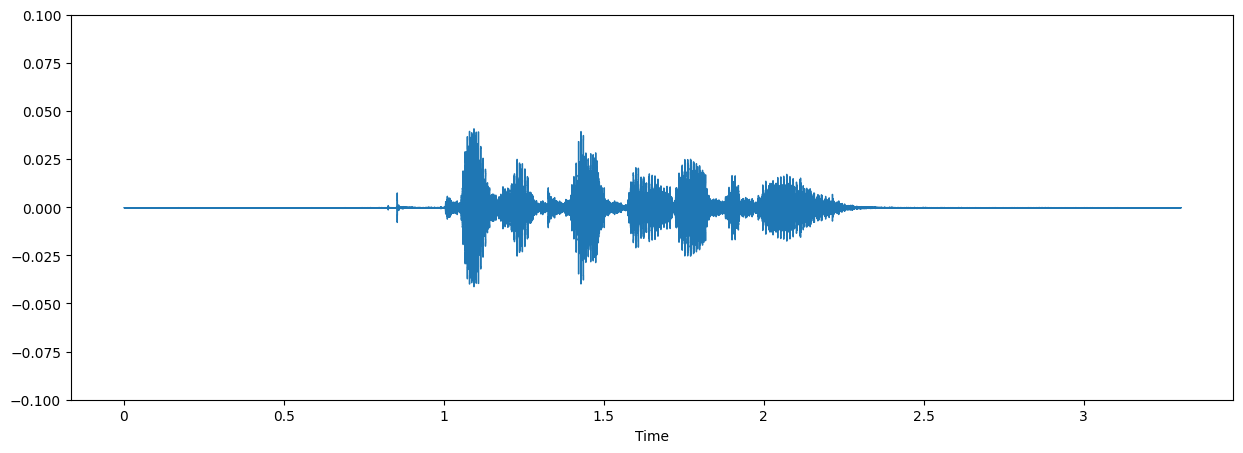

In [33]:
plt.figure(figsize=(15,5))
librosa.display.waveshow(actor_1,sr=sr)
plt.ylim((-0.1,0.1))
plt.show()

In [34]:
result=np.array([])
mfcc=np.mean(librosa.feature.mfcc(y=actor_1,sr=sr,n_mfcc=40).T,axis=0)
result=np.hstack((result,mfcc))
chroma=np.mean(librosa.feature.chroma_stft(y=actor_1,sr=sr).T,axis=0)
result=np.hstack((result,chroma))
mel=np.mean(librosa.feature.melspectrogram(y=actor_1,sr=sr).T,axis=0)
result=np.hstack((result,mel))
spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=actor_1, sr=sr).T,axis=0)
result=np.hstack((result,spectral_rolloff))
result

array([-6.97792603e+02,  5.48900414e+01,  6.63465559e-01,  1.24357862e+01,
        7.73395157e+00,  5.30750394e-01, -3.21663094e+00, -3.15939426e+00,
       -1.09775515e+01, -2.84871101e+00,  8.15297484e-01, -3.03706694e+00,
        1.95544672e+00, -3.73566794e+00,  4.37700331e-01,  7.82356679e-01,
       -4.07142878e+00, -1.86077642e+00, -1.32368994e+00, -9.20463324e-01,
       -5.94761038e+00, -5.05438209e-01, -2.33739138e+00, -4.52277946e+00,
       -1.67972255e+00, -8.19320858e-01, -4.85848284e+00,  2.55336076e-01,
       -2.14870405e+00,  1.45055220e-01, -2.03575611e+00, -2.11963391e+00,
       -2.71258903e+00, -1.83612704e+00, -3.20480514e+00, -1.54536855e+00,
       -1.09093702e+00, -1.77010643e+00, -3.50113225e+00, -1.53808749e+00,
        6.55044675e-01,  6.10740960e-01,  5.68578839e-01,  5.72311342e-01,
        5.55372298e-01,  5.29292762e-01,  5.87064683e-01,  6.38355017e-01,
        6.42917693e-01,  6.06422305e-01,  6.10109210e-01,  6.04038656e-01,
        1.35779374e-06,  

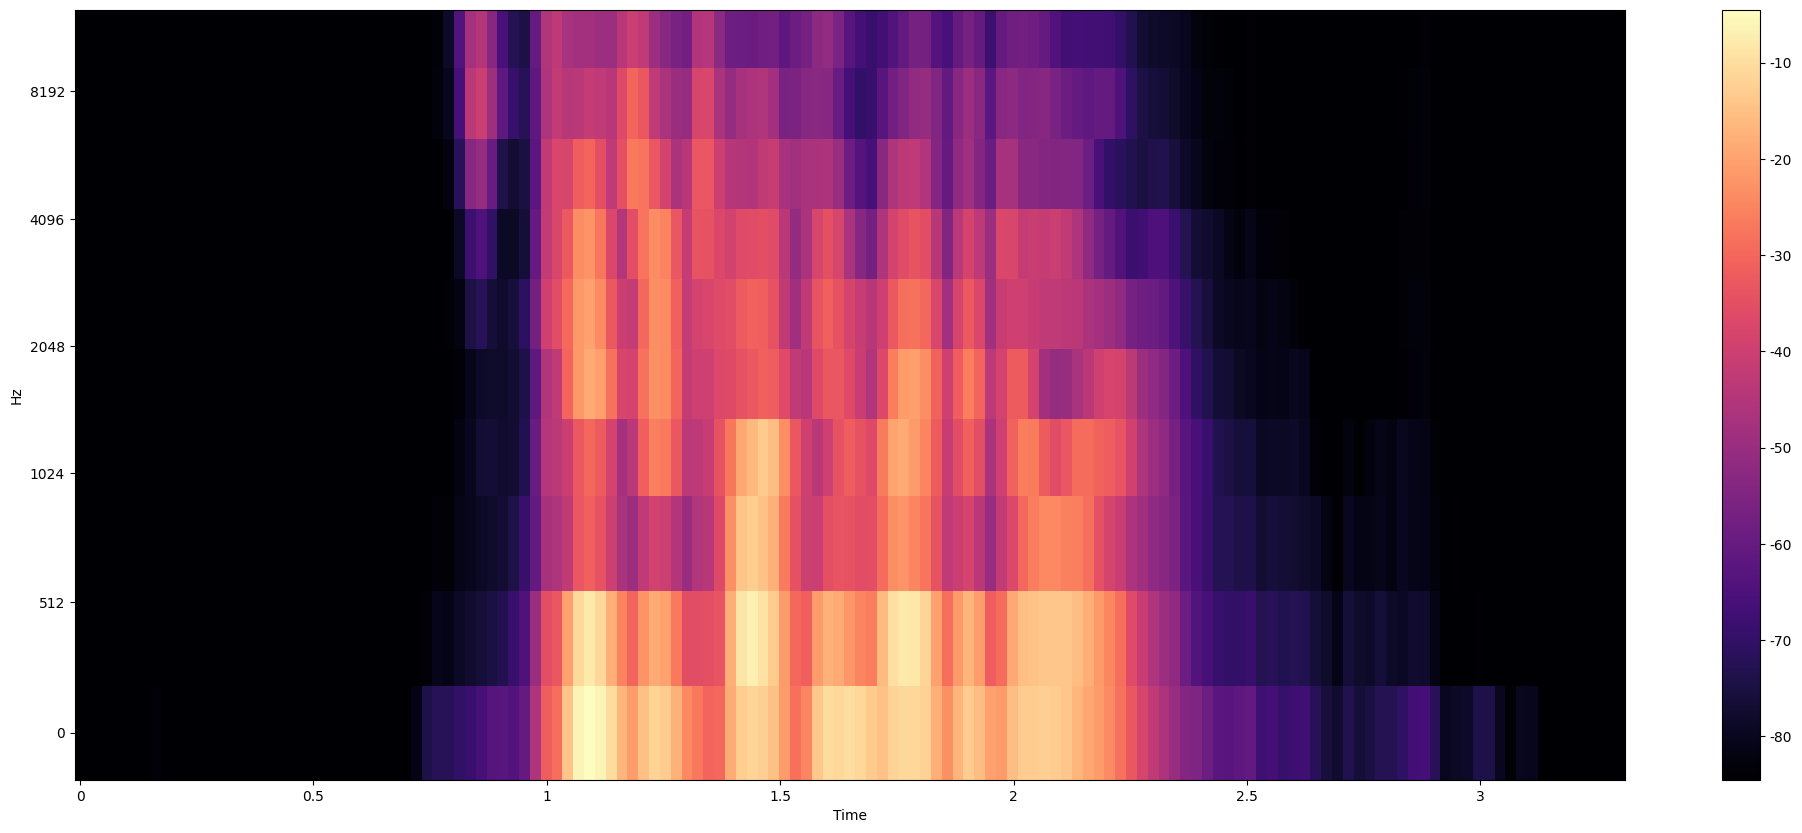

In [35]:
mel_spectrogram = librosa.feature.melspectrogram(y=actor_1, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [36]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
rms = librosa.feature.rms(y=actor_1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_voice = librosa.feature.zero_crossing_rate(y=actor_1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [37]:
def build_fc_model(input_shape=(180,1), num_class=8):
    
    
    model=tf.keras.models.Sequential([tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(512,activation='relu',input_shape=input_shape,kernel_regularizer=tf.keras.regularizers.l2(1e-2)),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(num_class,activation='softmax')
                                    ])

    return model

In [38]:
path=r"C:\Users\great\OneDrive\Desktop\Ravdess"
k=0
x_data=np.ndarray(shape=(24*60,120000))
y_data=np.ndarray(shape=(24*60,1))
for i,actor in enumerate(os.listdir(path)):
    path1=os.path.join(path,actor)
    for j,file in enumerate(os.listdir(path1)):
        b=file[6:8]
        y_data[k,0]=b
        y_data[k,0]=y_data[k,0]-1
        temp_path=os.path.join(path1,file)
        # print(temp_path)
        var,_=librosa.load(temp_path)
        x_data[k,:var.shape[0]]=var[:]
        x_data[k,var.shape[0]:]=0
        k=k+1

In [39]:
def extract_features(file):
    FRAME_SIZE = 1024
    HOP_LENGTH = 512
    result=np.array([])
    mfcc=np.mean(librosa.feature.mfcc(y=file,sr=sr,n_mfcc=40).T,axis=0)
    result=np.hstack((result,mfcc))
    chroma=np.mean(librosa.feature.chroma_stft(y=file,sr=sr).T,axis=0)
    result=np.hstack((result,chroma))
    mel=np.mean(librosa.feature.melspectrogram(y=file,sr=sr).T,axis=0)
    result=np.hstack((result,mel))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=file, sr=sr).T,axis=0)
    result=np.hstack((result,spectral_rolloff))
    rms= librosa.feature.rms(y=file, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
    result=np.hstack((result,rms))
    zcr= librosa.feature.zero_crossing_rate(y=file, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
    result=np.hstack((result,zcr))
    return result

In [40]:
x=[]
for i in range(24*60):
    feature=extract_features(x_data[i,:])
    x.append(feature)

In [41]:
model=build_fc_model()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test,y_train,y_test = train_test_split(np.array(x), y_data, test_size=0.2, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
from tensorflow.keras.callbacks import CSVLogger
model=build_fc_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
csv_logger = CSVLogger('model_history.log', separator=',', append=False)
history=model.fit(x_train,y_train,epochs=500,batch_size=256,validation_data=(x_test,y_test),callbacks=[csv_logger])

Epoch 1/500
5/5 [==============================] - 2s 91ms/step - loss: 7.9768 - accuracy: 0.2274 - val_loss: 7.3507 - val_accuracy: 0.3021
Epoch 2/500
5/5 [==============================] - 0s 27ms/step - loss: 6.9480 - accuracy: 0.3698 - val_loss: 6.5881 - val_accuracy: 0.3333
Epoch 3/500
5/5 [==============================] - 0s 28ms/step - loss: 6.1323 - accuracy: 0.4444 - val_loss: 5.9678 - val_accuracy: 0.3438
Epoch 4/500
5/5 [==============================] - 0s 30ms/step - loss: 5.3935 - accuracy: 0.5321 - val_loss: 5.3521 - val_accuracy: 0.4514
Epoch 5/500
5/5 [==============================] - 0s 31ms/step - loss: 4.7486 - accuracy: 0.6024 - val_loss: 4.8727 - val_accuracy: 0.4167
Epoch 6/500
5/5 [==============================] - 0s 30ms/step - loss: 4.1737 - accuracy: 0.6424 - val_loss: 4.4309 - val_accuracy: 0.4688
Epoch 7/500
5/5 [==============================] - 0s 33ms/step - loss: 3.6943 - accuracy: 0.6849 - val_loss: 4.1262 - val_accuracy: 0.4757
Epoch 8/500
5/5 [===

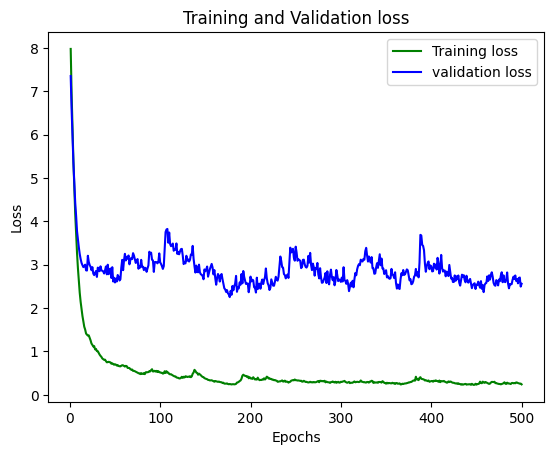

In [45]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,501)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

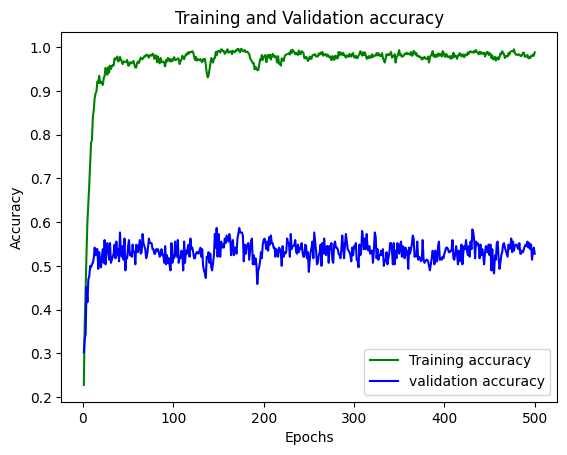

In [49]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,501)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
model.evaluate(x_test,y_test)


9/9 [==============================] - 0s 8ms/step - loss: 2.5609 - accuracy: 0.5278


[2.5609304904937744, 0.5277777910232544]

# Modificattion

In [104]:
def build_fc_model2(input_shape=(180,1), num_class=8):
    
    
    model=tf.keras.models.Sequential([tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(512,activation='relu',input_shape=input_shape,kernel_regularizer=tf.keras.regularizers.l2(1e-2)),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(256,activation='tanh',kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
                                    tf.keras.layers.Dense(128,activation='sigmoid'),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(num_class,activation='softmax')
                                    ])

    return model
model=build_fc_model2()
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.015),metrics=['AUC'])

In [107]:
earlystop=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.01,
    patience=50,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(scheduler)

history2=model.fit(x_train,y_train,epochs=50,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/50
1/5 [=====>........................] - ETA: 0s - loss: 0.4419 - accuracy: 0.9844

5/5 [==============================] - 0s 22ms/step - loss: 0.4426 - accuracy: 0.9852 - val_loss: 1.6010 - val_accuracy: 0.5451
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 0.4406 - accuracy: 0.9931 - val_loss: 1.6010 - val_accuracy: 0.5451
Epoch 3/50
5/5 [==============================] - 0s 23ms/step - loss: 0.4428 - accuracy: 0.9905 - val_loss: 1.6010 - val_accuracy: 0.5451
Epoch 4/50
5/5 [==============================] - 0s 20ms/step - loss: 0.4442 - accuracy: 0.9878 - val_loss: 1.6010 - val_accuracy: 0.5451
Epoch 5/50
5/5 [==============================] - 0s 26ms/step - loss: 0.4460 - accuracy: 0.9887 - val_loss: 1.6010 - val_accuracy: 0.5451
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 0.4482 - accuracy: 0.9852 - val_loss: 1.6010 - val_accuracy: 0.5451
Epoch 7/50
5/5 [==============================] - 0s 25ms/step - loss: 0.4479 - accuracy: 0.9878 - val_loss: 1.6010 - val_accuracy: 0.5451
Epoch 8/50
5/5 [======================